## Импорт библиотек и загрузка данных

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Загрузка данных
df = pd.read_csv("/content/Global_EV_2023_StrictFiltered.csv")

## Предобработка данных

In [24]:
df['unit'] = df['unit'].map({'Vehicles': 1, 'percent': 0.01, 'charging points': 2, 'GWh': 3, 'Milion barrels per day': 4, 'Oil displacement, million lge': 5})
df = pd.get_dummies(df, columns=['region', 'category', 'parameter', 'mode', 'powertrain'])

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y = discretizer.fit_transform(df[['value']]).ravel()


## Разделение на обучающую и тестовую выборки

In [26]:
y = y.astype(int)

X = df.drop('value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Создание модели SVC

In [4]:
# Определение гиперпараметров для GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Создание модели SVM
model = SVC()

# Поиск лучших гиперпараметров с помощью GridSearchCV
grid = GridSearchCV(model, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print(grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   7.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   7.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=   6.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   3.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   3.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

## Обучение модели

In [5]:
# Обучение модели с лучшими гиперпараметрами
best_model = SVC(**grid.best_params_)
best_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = best_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9388
Precision: 0.9350
Recall: 0.9388
F1-score: 0.9367


## Обучение модели с выбором наилучших признаков

In [6]:
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Поиск лучших гиперпараметров для модели с выбранными признаками
grid_selected = GridSearchCV(model, param_grid, refit=True, verbose=3)
grid_selected.fit(X_train_selected, y_train)

# Вывод лучших гиперпараметров для модели с выбранными признаками
print(grid_selected.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

## Обучение модели с лучшими гиперпараметрами и выбранными признаками

In [7]:
best_model_selected = SVC(**grid_selected.best_params_)
best_model_selected.fit(X_train_selected, y_train)

# Предсказания на тестовой выборке
y_pred_selected = best_model_selected.predict(X_test_selected)

# Оценка качества модели с выбранными признаками
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected, average='weighted')
recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

print(f"Accuracy (selected features): {accuracy_selected:.4f}")
print(f"Precision (selected features): {precision_selected:.4f}")
print(f"Recall (selected features): {recall_selected:.4f}")
print(f"F1-score (selected features): {f1_selected:.4f}")

Accuracy (selected features): 0.9115
Precision (selected features): 0.8309
Recall (selected features): 0.9115
F1-score (selected features): 0.8693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Визуализация метрик качества

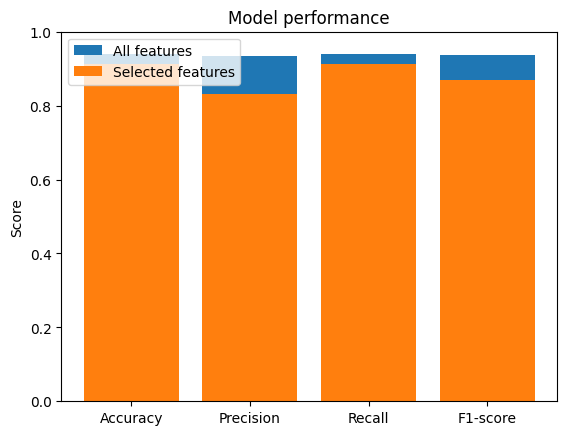

In [8]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
values_selected = [accuracy_selected, precision_selected, recall_selected, f1_selected]

plt.bar(metrics, values, label='All features')
plt.bar(metrics, values_selected, label='Selected features')
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('Model performance')
plt.legend()
plt.show()